In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import mannwhitneyu
import re
import os
import seaborn as sns
from matplotlib import cm, colors

In [2]:
pd.set_option('display.max_columns', None) # Mostrar todas las columnas del DataFrame

In [3]:
NUMBER_VOICES = 20
PATH = os.getcwd()
TEST_FOLDER = 'test-result'
CASO_MATI = 'caso_mati.csv'
TEST_RESULT = 'Test_Subjetivo_Analisis_de_voces_artificiales_Submissions.csv'
GRAPH_FOLDER = 'sample-population'

## Caso arreglo mati

In [4]:
df_mati = pd.read_csv(os.path.join(PATH, TEST_FOLDER, CASO_MATI))

In [5]:
df_mati.columns = [x.strip() for x in df_mati.columns]

df_mati.rename(
    columns={
        "Cadencia": "Cadencia (16)",
        "Cadencia (16)": "Cadencia (17)",
        "Cadencia (17)": "Cadencia (18)",
        "Cadencia (18)": "Cadencia (19)",
        "Cadencia (19)": "Cadencia (20)",
        "¿Cuál es tu género?": "¿Cuál es tu género?\n",
        "¿Tienes experiencia previa utilizando tecnología de voz, como asistentes virtuales o sistemas de reconocimiento de voz?": "¿Tienes experiencia previa utilizando tecnología de voz, como asistentes virtuales o sistemas de reconocimiento de voz?\n"
    },
    inplace=True
)

In [6]:
df_mati

,Submission ID,Respondent ID,Submitted at,¿En cuál rango de edad te encuentras?,¿En qué lugar geográfico residís?,¿Cuál es tu género?\n,"¿Tienes experiencia previa utilizando tecnología de voz, como asistentes virtuales o sistemas de reconocimiento de voz?\n",Comprensión del mensaje (1),Pronunciación (1),Acentuación (1),Naturalidad (1),Cadencia (1),Comprensión del mensaje (2),Pronunciación (2),Acentuación (2),Naturalidad (2),Cadencia (2),Comprensión del mensaje (3),Pronunciación (3),Acentuación (3),Naturalidad (3),Cadencia (3),Comprensión del mensaje (4),Pronunciación (4),Acentuación (4),Naturalidad (4),Cadencia (4),Comprensión del mensaje (5),Pronunciación (5),Acentuación (5),Naturalidad (5),Cadencia (5),Comprensión del mensaje (6),Pronunciación (6),Acentuación (6),Naturalidad (6),Cadencia (6),Comprensión del mensaje (7),Pronunciación (7),Acentuación (7),Naturalidad (7),Cadencia (7),Comprensión del mensaje (8),Pronunciación (8),Acentuación (8),Naturalidad (8),Cadencia (8),Comprensión del mensaje (9),Pronunciación (9),Acentuación (9),Naturalidad (9),Cadencia (9),Comprensión del mensaje (10),Pronunciación (10),Acentuación (10),Naturalidad (10),Cadencia (10),Comprensión del mensaje (11),Pronunciación (11),Acentuación (11),Naturalidad (11),Cadencia (11),Comprensión del mensaje (12),Pronunciación (12),Acentuación (12),Naturalidad (12),Cadencia (12),Comprensión del mensaje (13),Pronunciación (13),Acentuación (13),Naturalidad (13),Cadencia (13),Comprensión del mensaje (14),Pronunciación (14),Acentuación (14),Naturalidad (14),Cadencia (14),Comprensión del mensaje (15),Pronunciación (15),Acentuación (15),Naturalidad (15),Cadencia (15),Comprensión del mensaje (16),Pronunciación (16),Acentuación (16),Naturalidad (16),Cadencia (16),Comprensión del mensaje (17),Pronunciación (17),Acentuación (17),Naturalidad (17),Cadencia (17),Comprensión del mensaje (18),Pronunciación (18),Acentuación (18),Naturalidad (18),Cadencia (18),Comprensión del mensaje (19),Pronunciación (19),Acentuación (19),Naturalidad (19),Cadencia (19),Comprensión del mensaje (20),Pronunciación (20),Acentuación (20),Naturalidad (20),Cadencia (20)
0,ZODWNy,AKvxEe,2023-05-31 22:37:39,Entre 25 y 29 años,Buenos Aires,Masculino,No,5,5,5,4,5,5,5,5,5,5,5,4,2,2,2,4,3,3,3,4,5,4,2,2,3,5,5,5,4,5,5,5,5,5,5,5,5,5,5,5,5,4,5,3,4,5,4,3,2,3,5,5,3,2,3,4,5,4,2,3,5,4,4,1,1,5,4,5,5,5,4,3,4,5,5,5,5,5,3,5,5,3,3,4,2,5,4,4,3,3,5,5,5,4,5,5,5,5,4,5


## Comienzo de datos

In [7]:
df = pd.read_csv(os.path.join(PATH, TEST_FOLDER, TEST_RESULT))

In [8]:
df.head()

,Submission ID,Respondent ID,Submitted at,¿En cuál rango de edad te encuentras?,¿En qué lugar geográfico residís?,¿Cuál es tu género?\n,"¿Tienes experiencia previa utilizando tecnología de voz, como asistentes virtuales o sistemas de reconocimiento de voz?\n",Comprensión del mensaje (1),Pronunciación (1),Acentuación (1),Naturalidad (1),Cadencia (1),Comprensión del mensaje (2),Pronunciación (2),Acentuación (2),Naturalidad (2),Cadencia (2),Comprensión del mensaje (3),Pronunciación (3),Acentuación (3),Naturalidad (3),Cadencia (3),Comprensión del mensaje (4),Pronunciación (4),Acentuación (4),Naturalidad (4),Cadencia (4),Comprensión del mensaje (5),Pronunciación (5),Acentuación (5),Naturalidad (5),Cadencia (5),Comprensión del mensaje (6),Pronunciación (6),Acentuación (6),Naturalidad (6),Cadencia (6),Comprensión del mensaje (7),Pronunciación (7),Acentuación (7),Naturalidad (7),Cadencia (7),Comprensión del mensaje (8),Pronunciación (8),Acentuación (8),Naturalidad (8),Cadencia (8),Comprensión del mensaje (9),Pronunciación (9),Acentuación (9),Naturalidad (9),Cadencia (9),Comprensión del mensaje (10),Pronunciación (10),Acentuación (10),Naturalidad (10),Cadencia (10),Comprensión del mensaje (11),Pronunciación (11),Acentuación (11),Naturalidad (11),Cadencia (11),Comprensión del mensaje (12),Pronunciación (12),Acentuación (12),Naturalidad (12),Cadencia (12),Comprensión del mensaje (13),Pronunciación (13),Acentuación (13),Naturalidad (13),Cadencia (13),Comprensión del mensaje (14),Pronunciación (14),Acentuación (14),Naturalidad (14),Cadencia (14),Comprensión del mensaje (15),Pronunciación (15),Acentuación (15),Naturalidad (15),Cadencia (15),Comprensión del mensaje (16),Pronunciación (16),Acentuación (16),Naturalidad (16),Cadencia (16),Comprensión del mensaje (17),Pronunciación (17),Acentuación (17),Naturalidad (17),Cadencia (17),Comprensión del mensaje (18),Pronunciación (18),Acentuación (18),Naturalidad (18),Cadencia (18),Comprensión del mensaje (19),Pronunciación (19),Acentuación (19),Naturalidad (19),Cadencia (19),Comprensión del mensaje (20),Pronunciación (20),Acentuación (20),Naturalidad (20),Cadencia (20)
0,14RxaO,jbQeoJ,2023-06-01 16:51:37,Entre 25 y 29 años,Buenos Aires,Masculino,No,5,2,5,2,4,4,3,5,3,2,5,3,2,2,2,5,2,5,2,5,5,2,5,1,2,5,5,3,4,5,5,5,4,3,5,5,4,5,1,2,5,5,4,2,2,5,5,5,1,1,5,5,5,4,4,5,5,4,3,2,5,5,2,1,1,5,5,4,4,5,5,4,1,3,4,5,4,2,3,5,5,5,5,2,5,5,5,5,3,5,5,5,5,5,5,5,5,5,5,5
1,rOYWbR,Ol5QxR,2023-06-01 17:06:01,Entre 25 y 29 años,Ciudad Autónoma de Buenos Aires,Masculino,Sí,4,4,4,3,5,5,5,5,4,5,4,3,2,1,1,4,3,2,2,2,4,4,3,2,1,5,5,5,4,5,4,4,4,3,3,4,3,3,1,3,5,5,5,5,5,4,3,1,1,1,5,5,4,4,5,4,4,3,2,2,5,5,5,3,1,5,5,5,3,4,5,5,5,3,3,5,5,5,5,5,5,4,5,1,3,4,4,4,1,3,5,5,5,4,5,5,5,5,5,5
2,vDzZRv,vryyJl,2023-06-01 20:22:14,Entre 25 y 29 años,Buenos Aires,Femenino,Sí,5,5,4,3,3,5,5,4,4,4,5,3,1,1,1,5,3,3,2,4,4,3,1,1,1,4,4,4,3,3,4,4,4,4,4,3,3,3,3,3,4,4,4,1,1,3,3,1,1,1,1,1,1,1,1,5,4,3,3,3,4,1,1,1,1,4,4,4,4,4,5,2,3,5,4,4,4,3,3,2,4,4,4,3,3,4,4,3,1,2,4,4,3,4,3,4,4,4,4,4
3,MaVopM,oDMBOb,2023-06-01 22:09:25,Entre 25 y 29 años,Buenos Aires,Femenino,Sí,5,5,5,3,3,5,3,3,3,3,5,5,3,3,3,5,5,5,5,5,5,3,3,3,3,5,5,5,5,5,5,5,5,3,3,5,3,3,3,3,5,5,5,3,3,5,5,3,3,3,5,5,3,3,3,5,5,5,4,4,5,5,5,2,1,5,5,5,5,1,5,3,4,4,4,5,5,5,5,1,5,5,5,5,1,5,5,5,3,1,5,5,5,5,1,5,5,5,5,1
4,El6jGq,Zo6JLy,2023-06-01 23:11:57,Entre 55 y 59 años,Buenos Aires,Masculino,No,5,5,5,5,5,5,5,5,5,5,5,5,5,1,2,5,5,5,4,5,5,5,5,2,2,5,5,5,4,5,5,5,5,5,5,5,5,5,3,2,5,5,5,4,4,5,5,4,3,2,5,5,5,2,3,5,5,5,4,3,5,5,5,1,2,5,5,5,5,5,5,5,5,3,3,5,5,5,4,5,5,5,5,3,4,5,5,5,3,2,5,5,5,5,5,5,5,5,3,3


In [9]:
df = pd.concat([df_mati, df], ignore_index=True)

In [10]:
df.rename(
    columns={
        'Submitted at': 'Marca temporal',
        '¿En cuál rango de edad te encuentras?': 'Rango_edad',
        '¿En qué lugar geográfico residís?': 'Lugar_geografico',
        '¿Cuál es tu género?\n': 'Genero',
        '¿Tienes experiencia previa utilizando tecnología de voz, como asistentes virtuales o sistemas de reconocimiento de voz?\n': 'Experiencia'
    },
    inplace=True)

## Sample Analysis

In [11]:
df_sample = df.loc[:, ['Lugar_geografico', 'Genero', 'Rango_edad', 'Experiencia']]

In [12]:
df_sample.head()

,Lugar_geografico,Genero,Rango_edad,Experiencia
0,Buenos Aires,Masculino,Entre 25 y 29 años,No
1,Buenos Aires,Masculino,Entre 25 y 29 años,No
2,Ciudad Autónoma de Buenos Aires,Masculino,Entre 25 y 29 años,Sí
3,Buenos Aires,Femenino,Entre 25 y 29 años,Sí
4,Buenos Aires,Femenino,Entre 25 y 29 años,Sí


### Rango de edad

In [13]:
data_age = df_sample.Rango_edad.value_counts()
data_age = pd.DataFrame(data_age)
data_age = data_age.reset_index().rename(columns={'count': 'Cantidad'})
data_age['Total'] = len(df_sample)
data_age['Relative_freq'] = np.round((data_age.Cantidad / data_age.Total)*100, 1)
data_age.sort_values(by=['Rango_edad'],inplace= True)
data_age

,Rango_edad,Cantidad,Total,Relative_freq
1,Entre 18 y 24 años,5,40,12.5
0,Entre 25 y 29 años,26,40,65.0
5,Entre 30 y 34 años,1,40,2.5
2,Entre 35 y 39 años,3,40,7.5
6,Entre 40 y 44 años,1,40,2.5
7,Entre 44 y 49 años,1,40,2.5
4,Entre 50 y 54 años,1,40,2.5
3,Entre 55 y 59 años,2,40,5.0


In [14]:
rango_edad_faltantes = {
    'Rango_edad': [
        'Menor a 18 años',
        'Entre 60 y 64 años',
        '65 años o más'
    ],
    'Cantidad': np.zeros((3,)),
    'Total': [len(df_sample)] * 3,
    'Relative_freq': [0.0] * 3,
}

df_add = pd.DataFrame(rango_edad_faltantes)

In [15]:
data_age = pd.concat([data_age, df_add], ignore_index=True)
age_order = [
    'Menor a 18 años', 'Entre 18 y 24 años', 'Entre 25 y 29 años',
    'Entre 30 y 34 años', 'Entre 35 y 39 años', 'Entre 40 y 44 años',
    'Entre 44 y 49 años', 'Entre 50 y 54 años', 'Entre 55 y 59 años', 
    'Entre 60 y 64 años', '65 años o más'
]
data_age['Rango_edad'] = pd.Categorical(data_age['Rango_edad'], categories=age_order, ordered=True)
data_age = data_age.sort_values('Rango_edad')
data_age

,Rango_edad,Cantidad,Total,Relative_freq
8,Menor a 18 años,0.0,40,0.0
0,Entre 18 y 24 años,5.0,40,12.5
1,Entre 25 y 29 años,26.0,40,65.0
2,Entre 30 y 34 años,1.0,40,2.5
3,Entre 35 y 39 años,3.0,40,7.5
4,Entre 40 y 44 años,1.0,40,2.5
5,Entre 44 y 49 años,1.0,40,2.5
6,Entre 50 y 54 años,1.0,40,2.5
7,Entre 55 y 59 años,2.0,40,5.0
9,Entre 60 y 64 años,0.0,40,0.0


In [16]:
data_age.Relative_freq.sum()

100.0

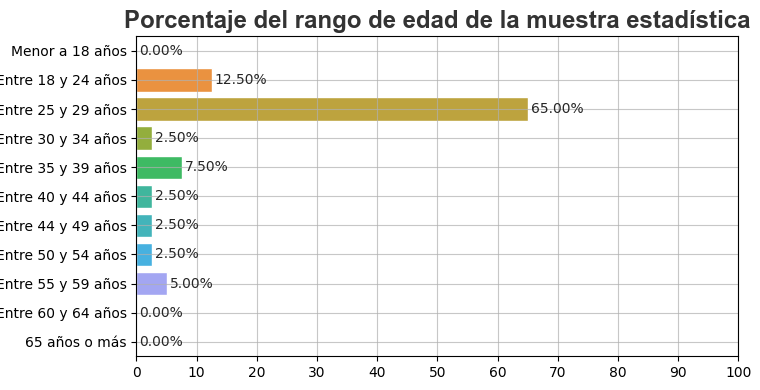

In [17]:
dims = (7.7, 4)
fig,ax = plt.subplots(figsize=dims)
with sns.axes_style('darkgrid'):
    g = sns.barplot(x = 'Relative_freq', y = 'Rango_edad',data=data_age,ax=ax,saturation=0.9,)
    g.set_xlabel('',weight='bold',size='x-large',alpha=0.8,family= 'Arial',stretch='extra-expanded')
    g.set_ylabel('',weight='bold',size='x-large',alpha=0.8,family= 'Arial',stretch='extra-expanded')
    g.set_title('Porcentaje del rango de edad de la muestra estadística',weight='bold',size='xx-large',alpha=0.8,family= 'Arial',stretch='condensed')
    g.set_xticks(list(range(0,110,10)))
    g.grid(alpha=0.7)
    # g.xaxis.grid(True, alpha=0.8)

    # Agregar etiquetas con los valores de las barras horizontales
    for p in g.patches:
        width = p.get_width()
        g.text(width + 0.5,
               p.get_y() + p.get_height() / 2,
               '{:1.2f}%'.format(width),
               ha="left",
               va="center")
    
    plt.tight_layout()

    plt.savefig(os.path.join(PATH, TEST_FOLDER, GRAPH_FOLDER, 'edad.png'))

### Género

In [18]:
data_gender = df_sample.Genero.value_counts()
data_gender = pd.DataFrame(data_gender)
data_gender = data_gender.reset_index().rename(columns={'count': 'Cantidad'})
data_gender['Total'] = len(df_sample)
data_gender['Relative_freq'] = np.round((data_gender.Cantidad / data_gender.Total)*100, 1)
data_gender.sort_values(by=['Genero'],inplace= True)
data_gender

,Genero,Cantidad,Total,Relative_freq
1,Femenino,9,40,22.5
0,Masculino,31,40,77.5


In [19]:
genero_faltantes = {
    'Genero': [
        'No binarie',
        'Prefiero no responder',
    ],
    'Cantidad': np.zeros((2,)),
    'Total': [len(df_sample)] * 2,
    'Relative_freq': [0.0] * 2,
}

df_add = pd.DataFrame(genero_faltantes)

In [20]:
data_gender = pd.concat([data_gender, df_add], ignore_index=True)
data_gender

,Genero,Cantidad,Total,Relative_freq
0,Femenino,9.0,40,22.5
1,Masculino,31.0,40,77.5
2,No binarie,0.0,40,0.0
3,Prefiero no responder,0.0,40,0.0


In [21]:
data_gender.Relative_freq.sum()

100.0

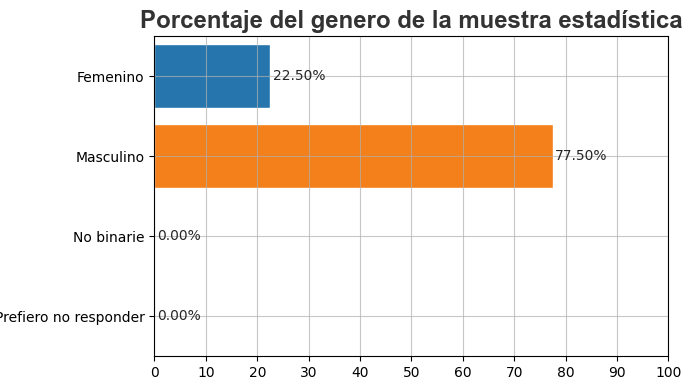

In [22]:
dims = (7,4)
fig,ax = plt.subplots(figsize=dims)
with sns.axes_style('darkgrid'):
    g = sns.barplot(x = 'Relative_freq', y = 'Genero',data=data_gender,ax=ax,saturation=0.9)
    g.set_xlabel('',weight='bold',size='xx-large',alpha=0.8,family= 'Arial',stretch='extra-expanded')
    g.set_ylabel('',weight='bold',size='x-large',alpha=0.8,family= 'Arial',stretch='extra-expanded')
    g.set_title('Porcentaje del genero de la muestra estadística',weight='bold',size='xx-large',alpha=0.8,family= 'Arial',stretch='extra-expanded')
    g.set_xticks(list(range(0,110,10)))
    g.grid(alpha=0.7)
    # g.xaxis.grid(True, alpha=0.8)

    # Agregar etiquetas con los valores de las barras horizontales
    for p in g.patches:
        width = p.get_width()
        g.text(width + 0.5,
               p.get_y() + p.get_height() / 2,
               '{:1.2f}%'.format(width),
               ha="left",
               va="center")
    
    plt.tight_layout()

    plt.savefig(os.path.join(PATH, TEST_FOLDER, GRAPH_FOLDER, 'genero.png'))

### Lugar Geográfico

In [23]:
data_zone = df_sample.Lugar_geografico.value_counts()
data_zone = pd.DataFrame(data_zone)
data_zone = data_zone.reset_index().rename(columns={'count': 'Cantidad'})
data_zone['Total'] = len(df_sample)
data_zone['Relative_freq'] = np.round((data_zone.Cantidad / data_zone.Total)*100, 1)
data_zone.sort_values(by=['Lugar_geografico'],inplace= True)
data_zone

,Lugar_geografico,Cantidad,Total,Relative_freq
0,Buenos Aires,23,40,57.5
1,Ciudad Autónoma de Buenos Aires,12,40,30.0
4,Córdoba,1,40,2.5
3,Mendoza,1,40,2.5
2,San Juan,2,40,5.0
5,Santa Fe,1,40,2.5


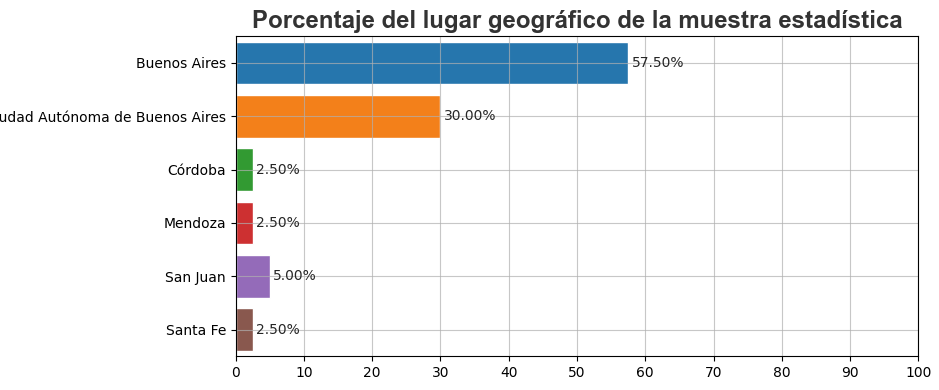

In [24]:
dims = (9.5,4)
fig,ax = plt.subplots(figsize=dims)
with sns.axes_style('darkgrid'):
    g = sns.barplot(x = 'Relative_freq', y = 'Lugar_geografico', data=data_zone,ax=ax,saturation=0.9)
    g.set_xlabel('',weight='bold',size='xx-large',alpha=0.8,family= 'Arial',stretch='extra-expanded')
    g.set_ylabel('',weight='bold',size='x-large',alpha=0.8,family= 'Arial',stretch='extra-expanded')
    g.set_title('Porcentaje del lugar geográfico de la muestra estadística',weight='bold',size='xx-large',alpha=0.8,family= 'Arial',stretch='extra-expanded')
    g.set_xticks(list(range(0,110,10)))
    g.grid(alpha=0.7)
    # g.xaxis.grid(True, alpha=0.8)

    # Agregar etiquetas con los valores de las barras horizontales
    for p in g.patches:
        width = p.get_width()
        g.text(width + 0.5,
               p.get_y() + p.get_height() / 2,
               '{:1.2f}%'.format(width),
               ha="left",
               va="center")

    plt.tight_layout()

    plt.savefig(os.path.join(PATH, TEST_FOLDER, GRAPH_FOLDER, 'lugar_geografico.png'))

### Experiencia en Uso de Tecnologías TTS

In [25]:
data_exp = df_sample.Experiencia.value_counts()
data_exp = pd.DataFrame(data_exp)
data_exp = data_exp.reset_index().rename(columns={'count': 'Cantidad'})
data_exp['Total'] = len(df_sample)
data_exp['Relative_freq'] = np.round((data_exp.Cantidad / data_exp.Total)*100, 1)
data_exp.sort_values(by=['Experiencia'],inplace= True)
data_exp

,Experiencia,Cantidad,Total,Relative_freq
1,No,16,40,40.0
2,No estoy seguro,4,40,10.0
0,Sí,20,40,50.0


In [26]:
exp_faltantes = {
    'Experiencia': ['Prefiero no responder'],
    'Cantidad': [0.0],
    'Total': [len(df_sample)],
    'Relative_freq': [0.0],
}

df_add = pd.DataFrame(exp_faltantes)

In [27]:
data_exp = pd.concat([data_exp, df_add], ignore_index=True)
data_exp

,Experiencia,Cantidad,Total,Relative_freq
0,No,16.0,40,40.0
1,No estoy seguro,4.0,40,10.0
2,Sí,20.0,40,50.0
3,Prefiero no responder,0.0,40,0.0


In [28]:
data_exp.Relative_freq.sum()

100.0

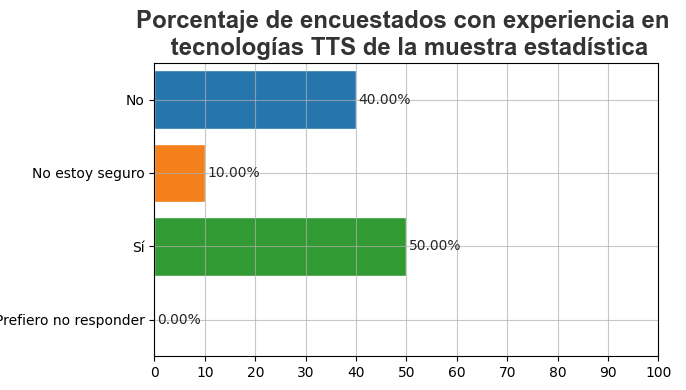

In [29]:
dims = (6.9,4)
fig,ax = plt.subplots(figsize=dims)
with sns.axes_style('darkgrid'):
    g = sns.barplot(x = 'Relative_freq', y = 'Experiencia',data=data_exp,ax=ax,saturation=0.9)
    g.set_xlabel('',weight='bold',size='xx-large',alpha=0.8,family= 'Arial',stretch='extra-expanded')
    g.set_ylabel('',weight='bold',size='x-large',alpha=0.8,family= 'Arial',stretch='extra-expanded')
    g.set_title('Porcentaje de encuestados con experiencia en \n tecnologías TTS de la muestra estadística',weight='bold',size='xx-large',alpha=0.8,family= 'Arial',stretch='extra-expanded')
    g.set_xticks(list(range(0,110,10)))
    g.grid(alpha=0.7)
    # g.xaxis.grid(True, alpha=0.8)

    # Agregar etiquetas con los valores de las barras horizontales
    for p in g.patches:
        width = p.get_width()
        g.text(width + 0.5,
               p.get_y() + p.get_height() / 2,
               '{:1.2f}%'.format(width),
               ha="left",
               va="center")
    
    plt.tight_layout()

    plt.savefig(os.path.join(PATH, TEST_FOLDER, GRAPH_FOLDER, 'experiencia_TTS.png'))

## Preprocessing

In [30]:
df.head()

,Submission ID,Respondent ID,Marca temporal,Rango_edad,Lugar_geografico,Genero,Experiencia,Comprensión del mensaje (1),Pronunciación (1),Acentuación (1),Naturalidad (1),Cadencia (1),Comprensión del mensaje (2),Pronunciación (2),Acentuación (2),Naturalidad (2),Cadencia (2),Comprensión del mensaje (3),Pronunciación (3),Acentuación (3),Naturalidad (3),Cadencia (3),Comprensión del mensaje (4),Pronunciación (4),Acentuación (4),Naturalidad (4),Cadencia (4),Comprensión del mensaje (5),Pronunciación (5),Acentuación (5),Naturalidad (5),Cadencia (5),Comprensión del mensaje (6),Pronunciación (6),Acentuación (6),Naturalidad (6),Cadencia (6),Comprensión del mensaje (7),Pronunciación (7),Acentuación (7),Naturalidad (7),Cadencia (7),Comprensión del mensaje (8),Pronunciación (8),Acentuación (8),Naturalidad (8),Cadencia (8),Comprensión del mensaje (9),Pronunciación (9),Acentuación (9),Naturalidad (9),Cadencia (9),Comprensión del mensaje (10),Pronunciación (10),Acentuación (10),Naturalidad (10),Cadencia (10),Comprensión del mensaje (11),Pronunciación (11),Acentuación (11),Naturalidad (11),Cadencia (11),Comprensión del mensaje (12),Pronunciación (12),Acentuación (12),Naturalidad (12),Cadencia (12),Comprensión del mensaje (13),Pronunciación (13),Acentuación (13),Naturalidad (13),Cadencia (13),Comprensión del mensaje (14),Pronunciación (14),Acentuación (14),Naturalidad (14),Cadencia (14),Comprensión del mensaje (15),Pronunciación (15),Acentuación (15),Naturalidad (15),Cadencia (15),Comprensión del mensaje (16),Pronunciación (16),Acentuación (16),Naturalidad (16),Cadencia (16),Comprensión del mensaje (17),Pronunciación (17),Acentuación (17),Naturalidad (17),Cadencia (17),Comprensión del mensaje (18),Pronunciación (18),Acentuación (18),Naturalidad (18),Cadencia (18),Comprensión del mensaje (19),Pronunciación (19),Acentuación (19),Naturalidad (19),Cadencia (19),Comprensión del mensaje (20),Pronunciación (20),Acentuación (20),Naturalidad (20),Cadencia (20)
0,ZODWNy,AKvxEe,2023-05-31 22:37:39,Entre 25 y 29 años,Buenos Aires,Masculino,No,5,5,5,4,5,5,5,5,5,5,5,4,2,2,2,4,3,3,3,4,5,4,2,2,3,5,5,5,4,5,5,5,5,5,5,5,5,5,5,5,5,4,5,3,4,5,4,3,2,3,5,5,3,2,3,4,5,4,2,3,5,4,4,1,1,5,4,5,5,5,4,3,4,5,5,5,5,5,3,5,5,3,3,4,2,5,4,4,3,3,5,5,5,4,5,5,5,5,4,5
1,14RxaO,jbQeoJ,2023-06-01 16:51:37,Entre 25 y 29 años,Buenos Aires,Masculino,No,5,2,5,2,4,4,3,5,3,2,5,3,2,2,2,5,2,5,2,5,5,2,5,1,2,5,5,3,4,5,5,5,4,3,5,5,4,5,1,2,5,5,4,2,2,5,5,5,1,1,5,5,5,4,4,5,5,4,3,2,5,5,2,1,1,5,5,4,4,5,5,4,1,3,4,5,4,2,3,5,5,5,5,2,5,5,5,5,3,5,5,5,5,5,5,5,5,5,5,5
2,rOYWbR,Ol5QxR,2023-06-01 17:06:01,Entre 25 y 29 años,Ciudad Autónoma de Buenos Aires,Masculino,Sí,4,4,4,3,5,5,5,5,4,5,4,3,2,1,1,4,3,2,2,2,4,4,3,2,1,5,5,5,4,5,4,4,4,3,3,4,3,3,1,3,5,5,5,5,5,4,3,1,1,1,5,5,4,4,5,4,4,3,2,2,5,5,5,3,1,5,5,5,3,4,5,5,5,3,3,5,5,5,5,5,5,4,5,1,3,4,4,4,1,3,5,5,5,4,5,5,5,5,5,5
3,vDzZRv,vryyJl,2023-06-01 20:22:14,Entre 25 y 29 años,Buenos Aires,Femenino,Sí,5,5,4,3,3,5,5,4,4,4,5,3,1,1,1,5,3,3,2,4,4,3,1,1,1,4,4,4,3,3,4,4,4,4,4,3,3,3,3,3,4,4,4,1,1,3,3,1,1,1,1,1,1,1,1,5,4,3,3,3,4,1,1,1,1,4,4,4,4,4,5,2,3,5,4,4,4,3,3,2,4,4,4,3,3,4,4,3,1,2,4,4,3,4,3,4,4,4,4,4
4,MaVopM,oDMBOb,2023-06-01 22:09:25,Entre 25 y 29 años,Buenos Aires,Femenino,Sí,5,5,5,3,3,5,3,3,3,3,5,5,3,3,3,5,5,5,5,5,5,3,3,3,3,5,5,5,5,5,5,5,5,3,3,5,3,3,3,3,5,5,5,3,3,5,5,3,3,3,5,5,3,3,3,5,5,5,4,4,5,5,5,2,1,5,5,5,5,1,5,3,4,4,4,5,5,5,5,1,5,5,5,5,1,5,5,5,3,1,5,5,5,5,1,5,5,5,5,1


In [31]:
# Crear una lista vacía para almacenar los DataFrames resultantes
dfs = []

# Iterar sobre las filas del DataFrame original
for i, row in df.iterrows():
    
    # Crear un nuevo DataFrame con una sola fila
    df_row = pd.DataFrame(row).T
    
    # Aplicar la función melt al DataFrame para transformarlo en el formato deseado
    df_melted = pd.melt(df_row,
                        id_vars=['Marca temporal'],
                        value_vars=[f'Comprensión del mensaje ({i})' for i in range(1, NUMBER_VOICES + 1)] +
                                   [f'Acentuación ({i})' for i in range(1, NUMBER_VOICES + 1)] +
                                   [f'Pronunciación ({i})' for i in range(1, NUMBER_VOICES + 1)] +
                                   [f'Cadencia ({i})' for i in range(1, NUMBER_VOICES + 1)] +
                                   [f'Naturalidad ({i})' for i in range(1, NUMBER_VOICES + 1)],
                        var_name='Variable',
                        value_name='Valor')
    
    # Agregar una columna con el número de voz
    df_melted['Voz'] = (df_melted.index % NUMBER_VOICES) + 1
    
    # Reemplazar los valores de la columna 'Variable' por los nombres deseados
    df_melted['Variable'] = df_melted['Variable'].replace({f'Comprensión del mensaje ({i})': 'Inteligibilidad' for i in range(1, NUMBER_VOICES + 1)})
    df_melted['Variable'] = df_melted['Variable'].replace({f'Acentuación ({i})': 'Acentuacion' for i in range(1, NUMBER_VOICES + 1)})
    df_melted['Variable'] = df_melted['Variable'].replace({f'Pronunciación ({i})': 'Pronunciacion' for i in range(1, NUMBER_VOICES + 1)})
    df_melted['Variable'] = df_melted['Variable'].replace({f'Cadencia ({i})': 'Cadencia' for i in range(1, NUMBER_VOICES + 1)})
    df_melted['Variable'] = df_melted['Variable'].replace({f'Naturalidad ({i})': 'Naturalidad' for i in range(1, NUMBER_VOICES + 1)})
    
    # Pivotear el DataFrame para obtener el formato final
    df_pivoted = df_melted.pivot(index='Voz', columns='Variable', values='Valor').reset_index()
    
    # Agregar la columna 'Marca temporal'
    df_pivoted['Marca temporal'] = row['Marca temporal']
    
    # Reordenar las columnas
    df_pivoted = df_pivoted[['Marca temporal', 'Inteligibilidad', 'Pronunciacion',  'Acentuacion', 'Naturalidad', 'Cadencia']]
    
    # Agregar el DataFrame a la lista
    dfs.append(df_pivoted)
    
# Concatenar los DataFrames de la lista para obtener el DataFrame final
df_final = pd.concat(dfs).reset_index(drop=True)


In [32]:
df[df['Marca temporal'] == '2023-06-01 20:22:14']

,Submission ID,Respondent ID,Marca temporal,Rango_edad,Lugar_geografico,Genero,Experiencia,Comprensión del mensaje (1),Pronunciación (1),Acentuación (1),Naturalidad (1),Cadencia (1),Comprensión del mensaje (2),Pronunciación (2),Acentuación (2),Naturalidad (2),Cadencia (2),Comprensión del mensaje (3),Pronunciación (3),Acentuación (3),Naturalidad (3),Cadencia (3),Comprensión del mensaje (4),Pronunciación (4),Acentuación (4),Naturalidad (4),Cadencia (4),Comprensión del mensaje (5),Pronunciación (5),Acentuación (5),Naturalidad (5),Cadencia (5),Comprensión del mensaje (6),Pronunciación (6),Acentuación (6),Naturalidad (6),Cadencia (6),Comprensión del mensaje (7),Pronunciación (7),Acentuación (7),Naturalidad (7),Cadencia (7),Comprensión del mensaje (8),Pronunciación (8),Acentuación (8),Naturalidad (8),Cadencia (8),Comprensión del mensaje (9),Pronunciación (9),Acentuación (9),Naturalidad (9),Cadencia (9),Comprensión del mensaje (10),Pronunciación (10),Acentuación (10),Naturalidad (10),Cadencia (10),Comprensión del mensaje (11),Pronunciación (11),Acentuación (11),Naturalidad (11),Cadencia (11),Comprensión del mensaje (12),Pronunciación (12),Acentuación (12),Naturalidad (12),Cadencia (12),Comprensión del mensaje (13),Pronunciación (13),Acentuación (13),Naturalidad (13),Cadencia (13),Comprensión del mensaje (14),Pronunciación (14),Acentuación (14),Naturalidad (14),Cadencia (14),Comprensión del mensaje (15),Pronunciación (15),Acentuación (15),Naturalidad (15),Cadencia (15),Comprensión del mensaje (16),Pronunciación (16),Acentuación (16),Naturalidad (16),Cadencia (16),Comprensión del mensaje (17),Pronunciación (17),Acentuación (17),Naturalidad (17),Cadencia (17),Comprensión del mensaje (18),Pronunciación (18),Acentuación (18),Naturalidad (18),Cadencia (18),Comprensión del mensaje (19),Pronunciación (19),Acentuación (19),Naturalidad (19),Cadencia (19),Comprensión del mensaje (20),Pronunciación (20),Acentuación (20),Naturalidad (20),Cadencia (20)
3,vDzZRv,vryyJl,2023-06-01 20:22:14,Entre 25 y 29 años,Buenos Aires,Femenino,Sí,5,5,4,3,3,5,5,4,4,4,5,3,1,1,1,5,3,3,2,4,4,3,1,1,1,4,4,4,3,3,4,4,4,4,4,3,3,3,3,3,4,4,4,1,1,3,3,1,1,1,1,1,1,1,1,5,4,3,3,3,4,1,1,1,1,4,4,4,4,4,5,2,3,5,4,4,4,3,3,2,4,4,4,3,3,4,4,3,1,2,4,4,3,4,3,4,4,4,4,4


In [33]:
df_final[df_final['Marca temporal'] == '2023-06-01 20:22:14']

# df_final['Marca temporal'].unique()

Variable,Marca temporal,Inteligibilidad,Pronunciacion,Acentuacion,Naturalidad,Cadencia
60,2023-06-01 20:22:14,5,5,4,3,3
61,2023-06-01 20:22:14,5,5,4,4,4
62,2023-06-01 20:22:14,5,3,1,1,1
63,2023-06-01 20:22:14,5,3,3,2,4
64,2023-06-01 20:22:14,4,3,1,1,1
65,2023-06-01 20:22:14,4,4,4,3,3
66,2023-06-01 20:22:14,4,4,4,4,4
67,2023-06-01 20:22:14,3,3,3,3,3
68,2023-06-01 20:22:14,4,4,4,1,1
69,2023-06-01 20:22:14,3,3,1,1,1


In [34]:
df_final = df_final.drop('Marca temporal', axis=1)
df_final = df_final.astype(int)

In [35]:
# Generar la columna "ID" con el patrón deseado
num_repetitions = 20
num_rows = len(df_final)
id_values = np.tile(np.arange(1, num_repetitions + 1), (num_rows // num_repetitions) + 1)[:num_rows]
df_final['ID'] = id_values

In [36]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Inteligibilidad  800 non-null    int32
 1   Pronunciacion    800 non-null    int32
 2   Acentuacion      800 non-null    int32
 3   Naturalidad      800 non-null    int32
 4   Cadencia         800 non-null    int32
 5   ID               800 non-null    int32
dtypes: int32(6)
memory usage: 18.9 KB


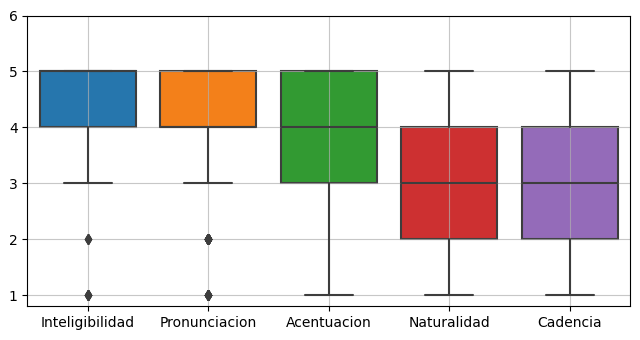

In [37]:
# Transformar el DataFrame para tener una columna con las categorías y otra con los valores
df_melted = df_final.melt(id_vars='ID', value_vars=['Inteligibilidad', 'Pronunciacion', 'Acentuacion', 'Naturalidad', 'Cadencia'], var_name='Variable', value_name='Valor')

dims = (6.5,3.5)
fig,ax = plt.subplots(figsize=dims)
with sns.axes_style('darkgrid'):
    # Crear un gráfico de caja para las columnas especificadas
    sns.boxplot(x='Variable', y='Valor', data=df_melted,ax=ax,saturation=0.9)
    
    # Personalizar el formato del gráfico
    ax.set_xlabel('',weight='bold',size='xx-large',alpha=0.8,family= 'Arial',stretch='extra-expanded')
    ax.set_ylabel('',weight='bold',size='x-large',alpha=0.8,family= 'Arial',stretch='extra-expanded')
    ax.set_yticks(list(range(1,7)))
    # ax.set_title('Porcentaje del genero de la muestra estadística',weight='bold',size='xx-large',alpha=0.8,family= 'Arial',stretch='extra-expanded')
    ax.grid(alpha=0.7)
    
    plt.tight_layout()

    plt.savefig(os.path.join(PATH, TEST_FOLDER, GRAPH_FOLDER, 'distribucion_muestra_estadistica.png'))

# Mostrar el gráfico
plt.show()

In [38]:
df_final.to_csv(r'aux_file\data_to_mannwhitney.csv', index=False)